## Predicting Heart Disease using Machine Learning

**Problem Definition**

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years

2. sex - (1 = male; 0 = female)

3. cp - chest pain type

  0: Typical angina: chest pain related decrease blood supply to the heart
  1: Atypical angina: chest pain not related to heart
  2: Non-anginal pain: typically esophageal spasms (non heart related)
  3: Asymptomatic: chest pain not showing signs of disease
  
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)

    - anything above 130-140 is typically cause for concern
    
5. chol - serum cholestoral in mg/dl

    - serum = LDL + HDL + .2 * triglycerides
    - above 200 is cause for concern
    
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

    - '>126' mg/dL signals diabetes
    
7. restecg - resting electrocardiographic results

     - 0: Nothing to note
     - 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
     - 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
        
8. thalach - maximum heart rate achieved

9. exang - exercise induced angina (1 = yes; 0 = no)

10. oldpeak - ST depression induced by exercise relative to rest

     - looks at stress of heart during excercise
     - unhealthy heart will stress more
     
11. slope - the slope of the peak exercise ST segment

     - 0: Upsloping: better heart rate with excercise (uncommon)
     - 1: Flatsloping: minimal change (typical healthy heart)
     - 2: Downslopins: signs of unhealthy heart
     
12. ca - number of major vessels (0-3) colored by flourosopy

     - colored vessel means the doctor can see the blood passing through
     - the more blood movement the better (no clots)
     
13. thal - thalium stress result

     - 1,3: normal
     - 6: fixed defect: used to be defect but ok now
     - 7: reversable defect: no proper blood movement when excercising
     
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [4]:
# Regular EDA and plotting libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# for plots to appear in the notebook
%matplotlib inline 

# Pipeline
from sklearn.pipeline import make_pipeline

# preprocessing
from sklearn.preprocessing import StandardScaler


In [5]:
## Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Loading data

In [6]:
df = pd.read_csv("heart.csv")
df.shape

(303, 14)

### Data Exploration

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
# Let's see how many positive (1) and negative (0) samples we have in our dataframe
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [12]:
# Normalized value counts
df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

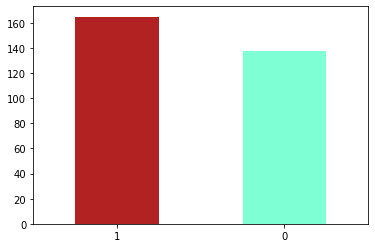

In [28]:
# Plotting the value counts with a bar graph
df.target.value_counts().plot(kind="bar", color=["firebrick", "aquamarine"])
plt.xticks(rotation=0); # for keeping the labels on the x-axis vertical

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Heart Disease Frequency according to Gender

In [19]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [20]:
# Comparing target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


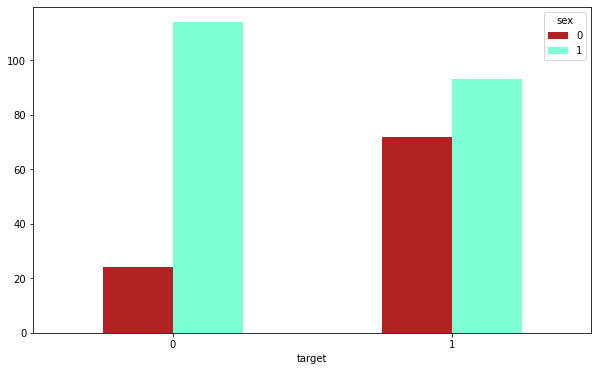

In [29]:
pd.crosstab(df.target, df.sex).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["firebrick", "aquamarine"])
plt.xticks(rotation=0); # for keeping the labels on the x-axis vertical

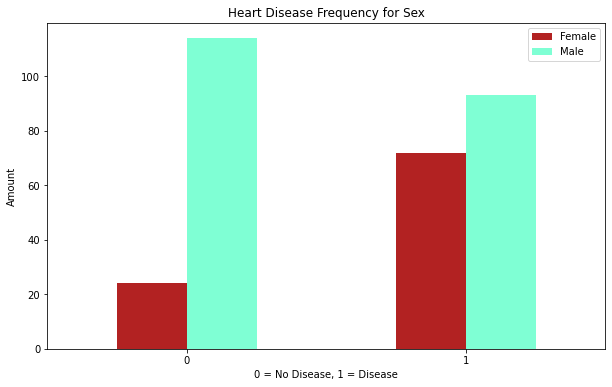

In [30]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["firebrick", "aquamarine"])

# Adding some attributes to it
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Age vs Max Heart rate for Heart Disease

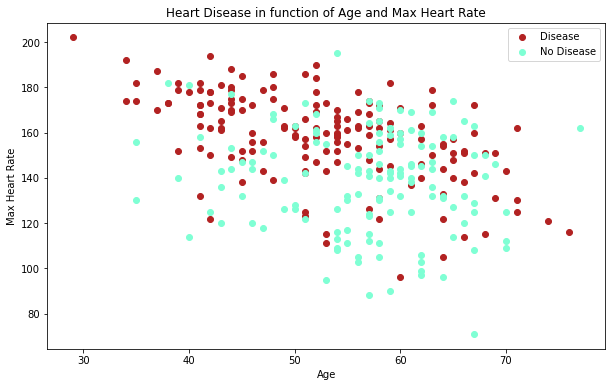

In [31]:
plt.figure(figsize=(10,6))

# Starting with positve examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="firebrick")

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="aquamarine")

# Adding some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

### Age distribution

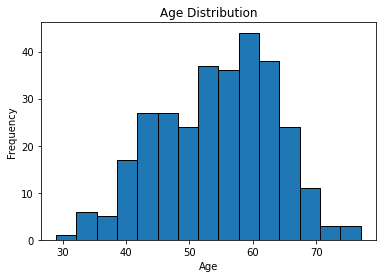

In [32]:
# Histograms are a great way to check the distribution of a variable
df.age.plot.hist(edgecolor='black', bins=15)
plt.title('Age Distribution')
plt.xlabel('Age');

**Ah, it's normally distributed**

In [33]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


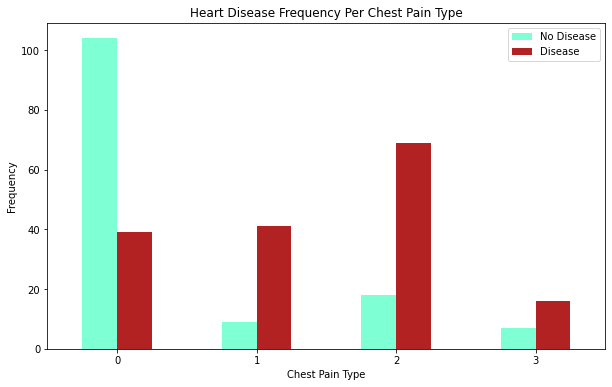

In [34]:
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["aquamarine", "firebrick"])

# Adding attributes to the plot
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

### Let's check the correlation between the various independent variables

In [35]:
corr_matrix = df.corr()
corr_matrix 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


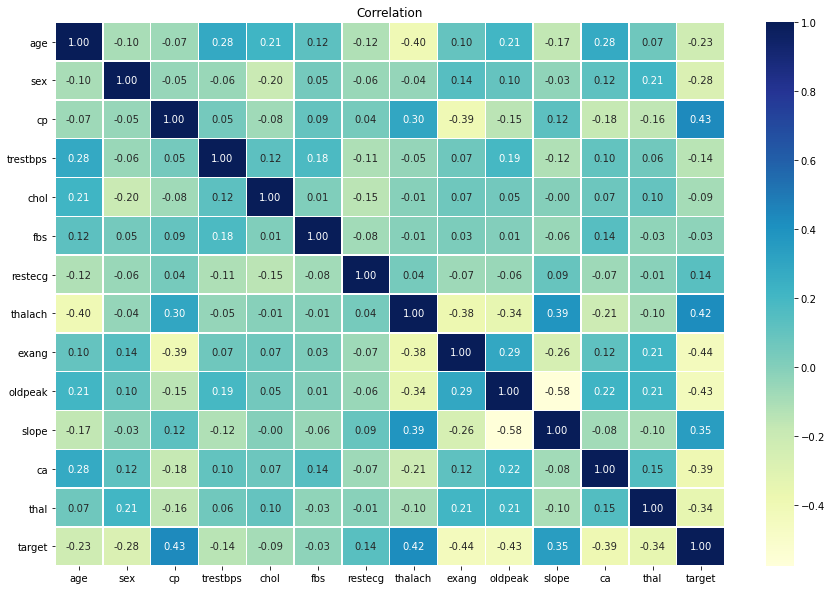

In [36]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu")
plt.title('Correlation');

### Model formualtion

In [41]:
# Independent variables
X = df.drop("target", axis=1)

# Target variable / dependent variable
y = df.target.values

In [43]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### Split that dataset into training and testing

In [44]:
# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                            test_size = 0.2) # percentage of data to use for test set

In [45]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
55,52,1,1,134,201,0,1,158,0,0.8,2,1,2
51,66,1,0,120,302,0,0,151,0,0.4,1,0,2
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3


In [46]:
y_train, len(y_train)

(array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
        1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1],
       dtype=int64),
 242)

In [47]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3


In [48]:
y_test, len(y_test)

(array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64),
 61)

### Model selection

 - Logistic Regression
 - Gaussian Naive Bayes
 - RandomForest Classifier

### Logistic Regression

In [50]:
model_scores = { }

pipe = make_pipeline(StandardScaler(), LogisticRegression())

pipe.fit(X_train, y_train)  # apply scaling on training data

model_scores['LogisticRegression'] = pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

### Gaussian Naive Bayes

In [51]:
pipe = make_pipeline(StandardScaler(), GaussianNB())

pipe.fit(X_train, y_train)  # apply scaling on training data

model_scores['GaussianNB'] = pipe.score(X_test, y_test) # apply scaling on testing data, without leaking training data

### Random Forest Classifier

In [52]:
pipe = make_pipeline(StandardScaler(), RandomForestClassifier())

pipe.fit(X_train, y_train)  # apply scaling on training data

model_scores[' RandomForestClassifier'] = pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data

In [53]:
model_scores

{'LogisticRegression': 0.7377049180327869,
 'GaussianNB': 0.7540983606557377,
 ' RandomForestClassifier': 0.7540983606557377}

### Model comparison

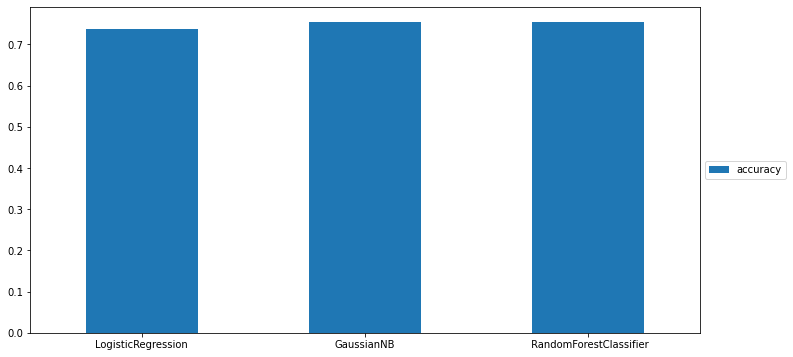

In [55]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar(figsize=(12,6))
plt.xticks(rotation=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout;

### Hyperparameter tuning and cross-validation

Tuning models with `RandomizedSearchCV`

In [58]:
# LogisticRegression hyperparameters

log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Gaussian Naive Bayes hyperparameters
nb_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# RandomForestClassifier hyperparameters

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

### Tuning Logistic Regression

In [59]:
#  random hyperparameter search for LogisticRegression
lr = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

lr.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


In [60]:
lr.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [61]:
lr.score(X_test, y_test)

0.8032786885245902

**After tuning the LogisticRegression Model's accuracy increased from 73% to 80%**

### Tuning Gaussian Naive Bayes

In [66]:
# random hyperparameter search for RandomForestClassifier
gb = RandomizedSearchCV(GaussianNB(),
                           param_distributions=nb_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

gb.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


In [67]:
gb.best_params_

{'var_smoothing': 0.0001}

In [68]:
gb.score(X_test, y_test)

0.7540983606557377

**It's interesting to note that hyperparamater tuning failed to improve the model using Naive Bayes**

### Tuning Random Forest Classifier

In [63]:
# random hyperparameter search for RandomForestClassifier
rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.0min finished


In [64]:
rf.best_params_

{'n_estimators': 810,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': None}

In [65]:
rf.score(X_test, y_test)

0.7704918032786885

**The model accuracy increased from 75% tO 77% using Random Forest Classifier**

Tuning using `GridSearchCV`

### Logistic Regression

In [71]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


In [72]:
# best parameters 
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [73]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.8032786885245902

**Model accuracy remained at 80% and so far gave us the best accuracy among other two classification methods**

### Model Evaluation

In [75]:
y_preds = gs_log_reg.predict(X_test)

### ROC curve and AUC scores

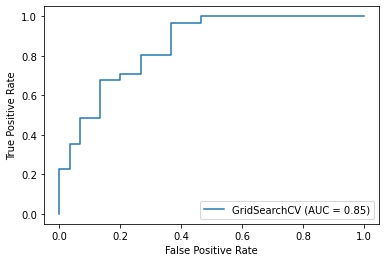

In [77]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

### Confusion Matrix

In [78]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[19 11]
 [ 1 30]]


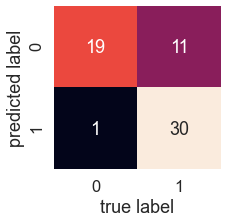

In [80]:
sns.set(font_scale=1.5) # Increasing font size

def plot_confusion_matrix(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotating the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_confusion_matrix(y_test, y_preds)

### Classification report

In [83]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.63      0.76        30
           1       0.73      0.97      0.83        31

    accuracy                           0.80        61
   macro avg       0.84      0.80      0.80        61
weighted avg       0.84      0.80      0.80        61



In [84]:
# Best hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [86]:
# Instantiating model with best hyperparameters (found with GridSearchCV)
model = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

### Accuracy

In [87]:
# Cross-validated accuracy score
cv_acc = cross_val_score(model,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [92]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

### Precison

In [93]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.8215873015873015

### Recall

In [94]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.9272727272727274

### F1 Score

In [95]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8705403543192143

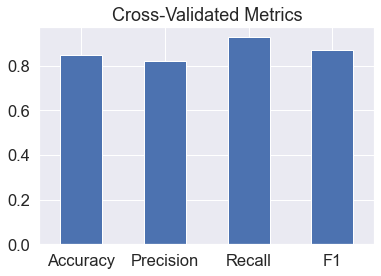

In [96]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False)
plt.xticks(rotation=0);

**So, the model accuracy has a 84% using Logistic Regression. Now I am going to try if I can further improve using neural networks**

In [97]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [98]:
X = tf.keras.utils.normalize(X)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.197454,0.003134,0.009403,0.454458,0.730267,0.003134,0.000000,0.470129,0.000000,0.007209,0.000000,0.000000,0.003134
1,0.108748,0.002939,0.005878,0.382088,0.734785,0.000000,0.002939,0.549619,0.000000,0.010287,0.000000,0.000000,0.005878
2,0.136825,0.000000,0.003337,0.433835,0.680787,0.000000,0.000000,0.573997,0.000000,0.004672,0.006674,0.000000,0.006674
3,0.172879,0.003087,0.003087,0.370456,0.728563,0.000000,0.003087,0.549509,0.000000,0.002470,0.006174,0.000000,0.006174
4,0.138431,0.000000,0.000000,0.291434,0.859729,0.000000,0.002429,0.395864,0.002429,0.001457,0.004857,0.000000,0.004857
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.183899,0.000000,0.000000,0.451681,0.777537,0.000000,0.003226,0.396834,0.003226,0.000645,0.003226,0.000000,0.009679
299,0.141409,0.003142,0.009427,0.345667,0.829601,0.000000,0.003142,0.414800,0.000000,0.003771,0.003142,0.000000,0.009427
300,0.236719,0.003481,0.000000,0.501287,0.671864,0.003481,0.003481,0.490844,0.000000,0.011836,0.003481,0.006962,0.010443
301,0.253520,0.004448,0.000000,0.578204,0.582651,0.000000,0.004448,0.511488,0.004448,0.005337,0.004448,0.004448,0.013343


In [100]:
X.shape

(303, 13)

In [101]:
y.shape

(303,)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state = 35)

In [103]:
X_train.shape

(227, 13)

In [105]:
model = Sequential()

model.add(Dense(256,input_shape=(227,13),activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))

model.add(Dense(4,activation='softmax'))

In [106]:
model.compile(optimizer= 'Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

In [107]:
model.fit(X_train,y_train,epochs = 500)

Epoch 1/500
8/8 [==============================] - 3s 13ms/step - loss: 1.3148 - accuracy: 0.4978
Epoch 2/500
8/8 [==============================] - 0s 3ms/step - loss: 0.9893 - accuracy: 0.5463
Epoch 3/500
8/8 [==============================] - 0s 3ms/step - loss: 0.7150 - accuracy: 0.5330
Epoch 4/500
8/8 [==============================] - 0s 4ms/step - loss: 0.7067 - accuracy: 0.4670
Epoch 5/500
8/8 [==============================] - 0s 5ms/step - loss: 0.7042 - accuracy: 0.4229
Epoch 6/500
8/8 [==============================] - 0s 3ms/step - loss: 0.7202 - accuracy: 0.5066
Epoch 7/500
8/8 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5595
Epoch 8/500
8/8 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5463
Epoch 9/500
8/8 [==============================] - 0s 3ms/step - loss: 0.7068 - accuracy: 0.4537
Epoch 10/500
8/8 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.5727
Epoch 11/500
8/8 [==========

In [108]:
model.save('heart_disease_classifier')

INFO:tensorflow:Assets written to: heart_disease_classifier\assets


### **Modeling using Neural Networks also resulted in an accuray of 84%, so we can conclude that the best approach to predicting heart disease can be done by using Logistic Regression or Neural Networks**